# Q1. You have a dataset containing customer transaction data. Perform data preprocessing tasks such as handling missing values, encoding categorical variables, and scaling numerical features. Provide code and explain your approach. 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\python\\August Infotech Test'

## Step 1: Problem Statement

### Perform data preprocessing tasks such as handling missing values, encoding categorical variables, and scaling numerical features.

## Step 2 : Data Collection

In [3]:
df1=pd.read_csv('bank.csv')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Step 3: EDA

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [7]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df1.shape

(11162, 17)

## Exploring the categorical features

In [11]:
for col in df1.select_dtypes(include='object').columns:
    print(f'{col} >>')
    print(df1[col].unique())
    print('*'*70)

job >>
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
**********************************************************************
marital >>
['married' 'single' 'divorced']
**********************************************************************
education >>
['secondary' 'tertiary' 'primary' 'unknown']
**********************************************************************
default >>
['no' 'yes']
**********************************************************************
housing >>
['yes' 'no']
**********************************************************************
loan >>
['no' 'yes']
**********************************************************************
contact >>
['unknown' 'cellular' 'telephone']
**********************************************************************
month >>
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
***********************************************

In [12]:
categorical_feature=[col for col in df1.columns if ((df1[col].dtypes=='object') and (col not in ['deposit']))]
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_feature:
    print('Feature name {} category count {}'.format(feature,len(df1[feature].unique())))

Feature name job category count 12
Feature name marital category count 3
Feature name education category count 4
Feature name default category count 2
Feature name housing category count 2
Feature name loan category count 2
Feature name contact category count 3
Feature name month category count 12
Feature name poutcome category count 4


## There are 3 features with binary classification and 6 features with multiclass.

## Step 4 : Feature Engineering

### Encoding Categorical Variables

In [14]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Treating column with multiple values

In [17]:
cat_columns=['job','marital','education','contact','month','poutcome']
for col in cat_columns:
    df1=pd.concat([df1.drop(col,axis=1),
                  pd.get_dummies(df1[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)

In [18]:
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,no,2343,yes,no,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,no,45,no,no,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,no,1270,yes,no,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,no,2476,yes,no,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,no,184,no,no,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,yes,no,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,no,733,no,no,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,no,29,no,no,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,no,0,no,yes,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


### Treating column with binary categorical values

In [19]:
df1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [20]:
bool_columns = ['default','housing','loan','deposit']
for col in bool_columns:
    df1[col+'_new']=df1[col].apply(lambda x: 1 if x=='yes' else 0)
    df1.drop(col,axis=1,inplace=True)

In [21]:
df1

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_new,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Scaling Numerical Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
df1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_new', 'housing_new', 'loan_new',
       'deposit_new'],
      dtype='object')

In [24]:
x=df1.drop('deposit_new',axis=1)
y=df1['deposit_new']

In [25]:
scaler=MinMaxScaler()
arr=scaler.fit_transform(x)
scaled_df=pd.DataFrame(arr,columns=x.columns)
scaled_df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_new,housing_new,loan_new
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.633333,0.065739,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11158,0.272727,0.086086,0.500000,0.020882,0.048387,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11159,0.181818,0.078091,0.600000,0.039701,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11160,0.324675,0.077762,0.233333,0.001805,0.016129,0.202339,0.086207,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Scaled the data using normalization(MinMax scaler)

In [28]:
scaled_df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_new,housing_new,loan_new
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.633333,0.065739,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11158,0.272727,0.086086,0.500000,0.020882,0.048387,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11159,0.181818,0.078091,0.600000,0.039701,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11160,0.324675,0.077762,0.233333,0.001805,0.016129,0.202339,0.086207,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Q2. You are tasked with building a predictive model to classify customer churn.Create a machine learning pipeline that includes data preprocessing, model selection, and evaluation. Provide code and explain your choice of model and evaluation metrics.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Step 1 : Problem Statement

### You are tasked with building a predictive model to classify customer churn. 

## Step 2 : Data Collection

In [32]:
df2=pd.read_csv('Churn_Modelling.csv')
df2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Step 3: EDA

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
df2.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
df2.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for outliers

<AxesSubplot:>

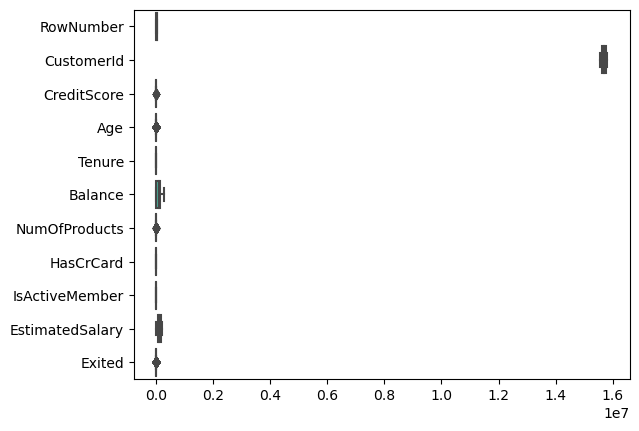

In [37]:
sns.boxplot(data=df2,orient='h')

### There is no outlier detected in the dataset

## Step 4: Featur Engineering

In [38]:
df2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [39]:
for col in df2.select_dtypes(include='object').columns:
    print(f'{col} >>')
    print(df2[col].unique())
    print('*'*70)

Surname >>
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
**********************************************************************
Geography >>
['France' 'Spain' 'Germany']
**********************************************************************
Gender >>
['Female' 'Male']
**********************************************************************


In [40]:
for col in df2.select_dtypes(include='object').columns:
    print(f'{col} >>')
    print(df2[col].nunique())
    print('*'*70)

Surname >>
2932
**********************************************************************
Geography >>
3
**********************************************************************
Gender >>
2
**********************************************************************


In [41]:
df2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
df2.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [43]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [44]:
for col in df2.select_dtypes(include='object').columns:
    print(f'{col} >>')
    print(df2[col].value_counts())
    print('*'*70)

Geography >>
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**********************************************************************
Gender >>
Male      5457
Female    4543
Name: Gender, dtype: int64
**********************************************************************


### Encoding the categorical variables using label encoder

In [45]:
le=LabelEncoder()
le

LabelEncoder()

In [47]:
df2['Geography']=le.fit_transform(df2['Geography'])

In [48]:
df2['Gender']=le.fit_transform(df2['Gender'])

In [49]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df2['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

## Step 5 : Model Training

In [51]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [52]:
RANDOM_SEED=30

In [54]:
df2.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [57]:
x=df2.drop(['Exited'],axis=1)
y=df2[['Exited']]

In [58]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [59]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Model 1 : Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
std=StandardScaler()
std

StandardScaler()

In [63]:
x_std=std.fit_transform(x)
x_std_df=pd.DataFrame(x_std,columns=x.columns)
x_std_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_std_df,y,test_size=0.20,random_state=RANDOM_SEED)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000, 1), (2000, 1))

In [65]:
LGR_Model=LogisticRegression(random_state=RANDOM_SEED)
LGR_Model

LogisticRegression(random_state=30)

In [66]:
LGR_Model.fit(x_train,y_train)

LogisticRegression(random_state=30)

## Step 6 : Model Evaluation

In [67]:
def model_eval(model,x,y):
    y_pred=model.predict(x)
    ac=accuracy_score(y,y_pred)
    print(f'Accuracy Score = {ac}')
    cm=confusion_matrix(y,y_pred)
    print(f'Confusion Matrix = \n{cm}')
    cr=classification_report(y,y_pred)
    print(f'Classificatin Report = \n{cr}')
    
    return 'success'

In [68]:
#Training Data
model_eval(LGR_Model,x_train,y_train)

Accuracy Score = 0.810625
Confusion Matrix = 
[[6212  187]
 [1328  273]]
Classificatin Report = 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6399
           1       0.59      0.17      0.26      1601

    accuracy                           0.81      8000
   macro avg       0.71      0.57      0.58      8000
weighted avg       0.78      0.81      0.77      8000



'success'

In [69]:
#Testing Data 
model_eval(LGR_Model,x_test,y_test)

Accuracy Score = 0.796
Confusion Matrix = 
[[1516   48]
 [ 360   76]]
Classificatin Report = 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1564
           1       0.61      0.17      0.27       436

    accuracy                           0.80      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.77      0.80      0.75      2000



'success'

## Here we are getting training accuracy is 81% and testing accuracy is 80%. So we can consider this model as generalized model.

# Q3. You have a text dataset containing customer reviews. Perform text preprocessing tasks such as tokenization, stop-word removal, and TF-IDF vectorization. Provide code and explain your approach.

# Step 1 : Problem Statement

### Perform text preprocessing tasks such as tokenization, stop-word removal, and TF-IDF vectorization

## Step 2 : Data Collection

In [71]:
data=pd.read_csv('Train.csv')
data.head(5)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [97]:
import nltk
nltk.download('all')

In [90]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [93]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
import nltk
nltk.download('omw-1.4')

In [ ]:
import nltk
nltk.download('punkt')

In [94]:
# importing libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer

In [82]:
data['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

## Step 3 : Preprocessing

In [107]:
# 1 remove space and newlines
def remove_space(data):
    clean_text=data.replace('\\n',' ').replace('\t',' ').replace('\\',' ')
    return clean_text

# 2 handling accented characters
def handling_accented(data):
    fixed_text= unidecode(data)
    return fixed_text
# 3 removing stopwords
stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens=word_tokenize(data)
    clean_text=[word.lower() for word in tokens if (word not in stopword_list)]
    return clean_text

# 4 Lemmatization
def lemmatization(data):
    lemmatizer=WordNetLemmatizer()
    final_data=[]
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return ' '.join(final_data)    

In [98]:
# spliting the data 
x_train,x_test,y_train,y_test=train_test_split(data.text,data.label,test_size=0.20,random_state=RANDOM_SEED)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32000,), (8000,), (32000,), (8000,))

In [ ]:
clean_text_train = x_train.apply(remove_space)
clean_text_test = x_test.apply(remove_space)

clean_text_train = x_train.apply(handling_accented)
clean_text_test = x_test.apply(handling_accented)

clean_text_train = x_train.apply(clean_data)
clean_text_test = x_test.apply(clean_data)

clean_text_train = x_train.apply(lemmatization)
clean_text_test = x_test.apply(lemmatization)

In [ ]:
clean_text_train

In [110]:
# Tfidf
tfidf = TfidfVectorizer(max_df=0.95,max_features=1000)
tfidf_train = tfidf.fit_transform(clean_text_train)
tfidf_test = tfidf.transform(clean_text_test)

In [111]:
tfidf_train

<32000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2818404 stored elements in Compressed Sparse Row format>

In [112]:
tfidf_train.A

array([[0.        , 0.        , 0.        , ..., 0.05639034, 0.        ,
        0.        ],
       [0.13568339, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [113]:
tfidf_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.05639034, 0.        ,
        0.        ],
       [0.13568339, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [114]:
tfidf.get_feature_names_out()

array(['10', '20', '30', '80', 'able', 'about', 'above', 'absolutely',
       'across', 'act', 'acted', 'acting', 'action', 'actor', 'actors',
       'actress', 'actual', 'actually', 'add', 'admit', 'after', 'again',
       'against', 'age', 'ago', 'agree', 'air', 'all', 'almost', 'alone',
       'along', 'already', 'also', 'although', 'always', 'am', 'amazing',
       'america', 'american', 'among', 'an', 'animation', 'annoying',
       'another', 'any', 'anyone', 'anything', 'anyway', 'apart',
       'apparently', 'appear', 'appears', 'are', 'aren', 'around', 'art',
       'as', 'ask', 'at', 'atmosphere', 'attempt', 'attempts',
       'attention', 'audience', 'average', 'avoid', 'away', 'awful',
       'baby', 'back', 'background', 'bad', 'badly', 'based', 'basically',
       'battle', 'be', 'beautiful', 'beauty', 'became', 'because',
       'become', 'becomes', 'been', 'before', 'begin', 'beginning',
       'begins', 'behind', 'being', 'believable', 'believe', 'best',
       'better

In [115]:
len(tfidf.get_feature_names_out())

1000

In [116]:
pd.DataFrame(tfidf_train.A,columns=tfidf.get_feature_names_out())

,10,20,30,80,able,about,above,absolutely,across,act,...,year,years,yes,yet,york,you,young,your,yourself,zombie
0,0.000000,0.0,0.0,0.000000,0.0,0.077076,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.098596,0.032679,0.000000,0.056390,0.0,0.0
1,0.135683,0.0,0.0,0.110046,0.0,0.127616,0.0,0.000000,0.000000,0.093932,...,0.000000,0.0,0.0,0.000000,0.000000,0.072142,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.051555,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.128334,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.078153,0.000000,0.036809,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.073328,0.0,0.0,0.000000,0.0,0.045979,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.077977,0.000000,0.067278,0.0,0.0
31996,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.105029,0.0,0.0,0.000000,0.000000,0.185916,0.000000,0.000000,0.0,0.0
31997,0.000000,0.0,0.0,0.000000,0.0,0.056973,0.0,0.058813,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.048311,0.000000,0.000000,0.0,0.0
31998,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.095314,0.000000,0.0,0.0


# Q5/6 You are working with a large-scale e-commerce platform and are tasked with improving the recommendation system. The dataset includes user behaviour data (clicks, purchases, views) and product details. Design a recommendation system that takes into account user behaviour, product features, and real-time updates. Provide a high-level architecture, code snippets (if necessary), and an explanation of your approach.

## Step 1 : Problem Statement

### You are working on a recommendation system project. Create a collaborative filtering-based recommendation system using user-item interaction data. 

## Step 2 : Data Collection

In [169]:
df6 = pd.read_csv('Customer Data.csv')
df6.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Step 3 : EDA

In [170]:
df6.shape

(8950, 18)

In [171]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [172]:
df6.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [173]:
df6.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Treating missing values

In [174]:
df6['MINIMUM_PAYMENTS'].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

### As it is a continuous value we will replace it by mean value

In [175]:
df6['MINIMUM_PAYMENTS']=df6['MINIMUM_PAYMENTS'].fillna(df6['MINIMUM_PAYMENTS'].mean())

In [176]:
df6['CREDIT_LIMIT']=df6['CREDIT_LIMIT'].fillna(df6['CREDIT_LIMIT'].mean())

In [177]:
df6.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [178]:
# find features with one value
for col in df6.columns:
    print(f'{col} >> {df6[col].nunique()}')

CUST_ID >> 8950
BALANCE >> 8871
BALANCE_FREQUENCY >> 43
PURCHASES >> 6203
ONEOFF_PURCHASES >> 4014
INSTALLMENTS_PURCHASES >> 4452
CASH_ADVANCE >> 4323
PURCHASES_FREQUENCY >> 47
ONEOFF_PURCHASES_FREQUENCY >> 47
PURCHASES_INSTALLMENTS_FREQUENCY >> 47
CASH_ADVANCE_FREQUENCY >> 54
CASH_ADVANCE_TRX >> 65
PURCHASES_TRX >> 173
CREDIT_LIMIT >> 206
PAYMENTS >> 8711
MINIMUM_PAYMENTS >> 8637
PRC_FULL_PAYMENT >> 47
TENURE >> 7


### No feature with single value

In [179]:
# checking for duplicate rows in dataset
df6.duplicated().sum()

0

In [180]:
df6.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [181]:
df6.drop(['CUST_ID'],axis=1,inplace=True)
df6.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


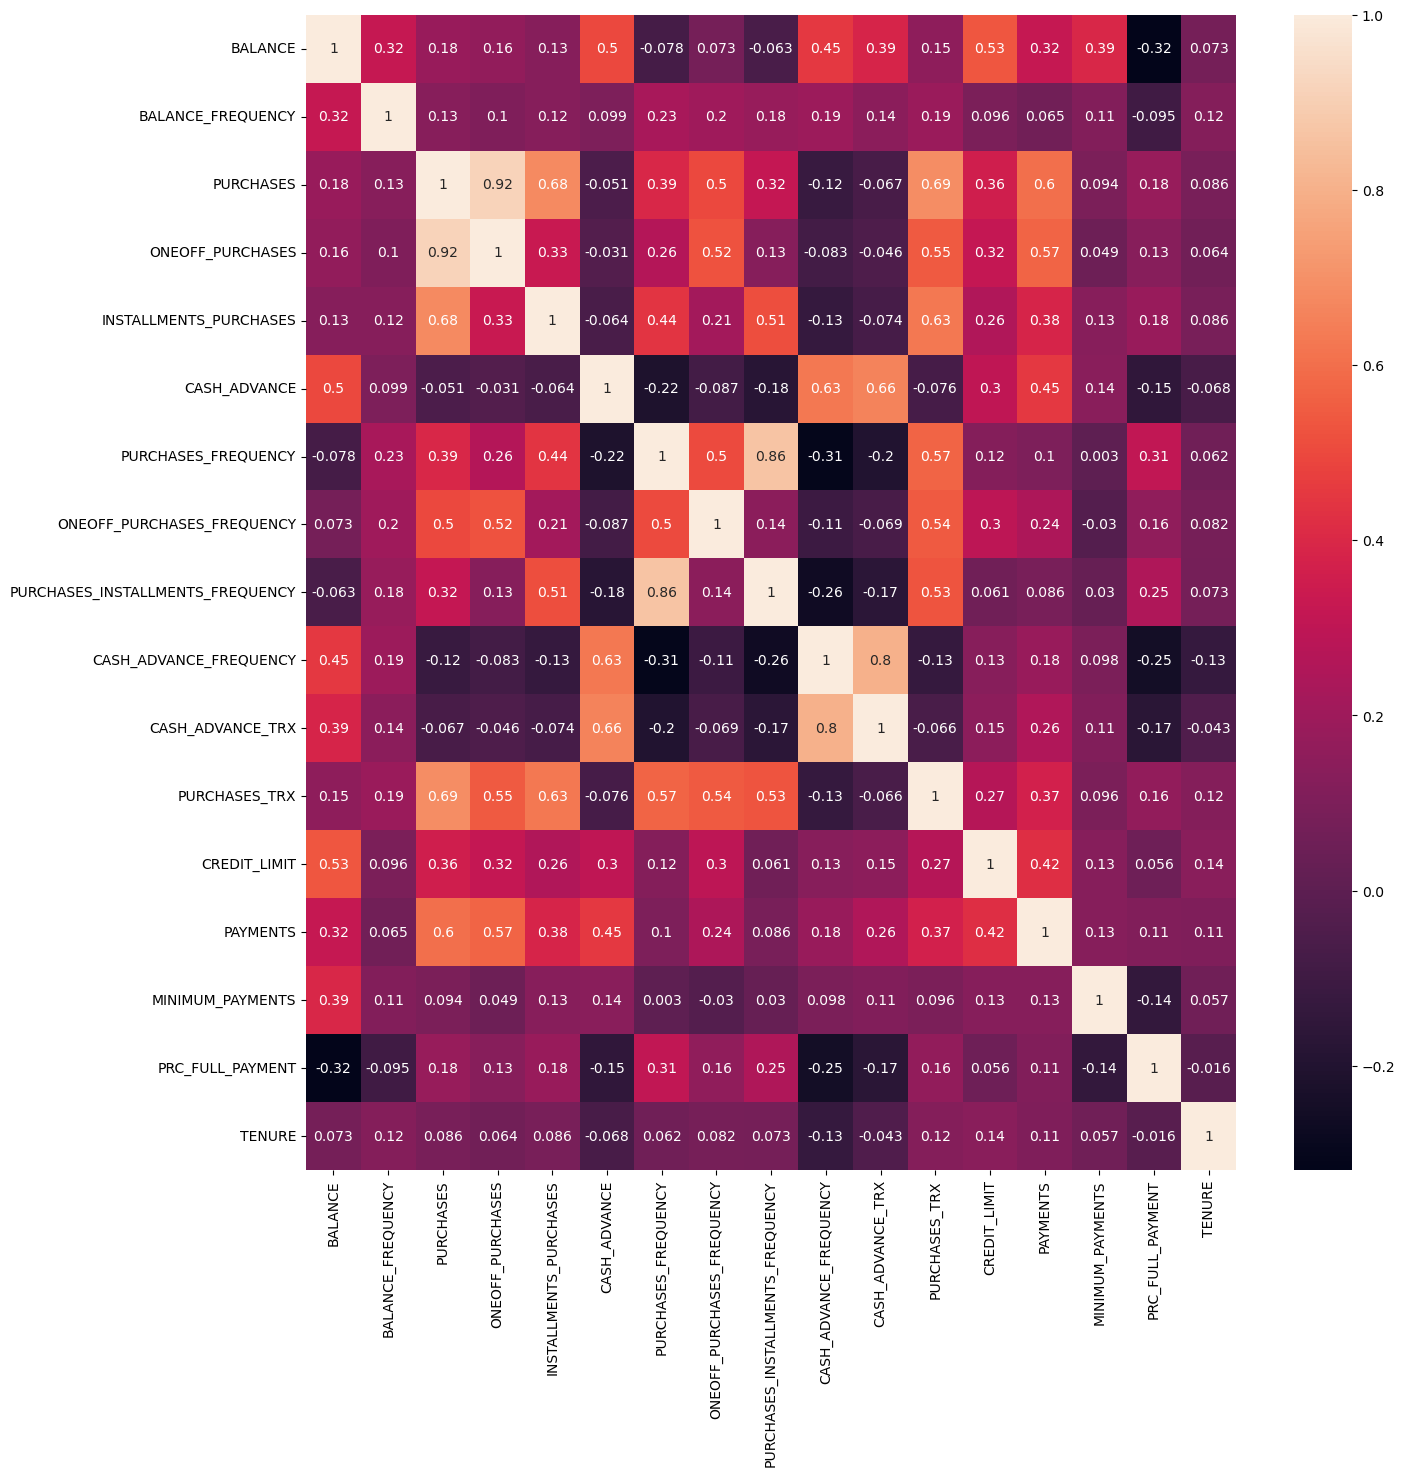

In [182]:
# checking the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df6.corr(),annot=True)
plt.show()

## Step 4 : Feature Engineering

### Scaling the data

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scalar=StandardScaler()

In [185]:
scaled_df=scalar.fit_transform(df6)
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Feature extraction using PCA

In [186]:
from sklearn.decomposition import PCA

In [187]:
df6.shape

(8950, 17)

In [188]:
col_name=[f'PC{i}' for i in range(1,18)]
pca=PCA(n_components=None)
arr_pca=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(arr_pca,columns=df6.columns)
pca_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774,-0.235181,-0.053886,-0.080479,-0.187230,0.151265,0.048461,-0.000161
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671,-0.871437,-0.601855,-0.037870,-0.736255,-0.532022,-0.082887,0.000003
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727,-0.001939,-0.761725,0.684204,0.695960,0.042311,0.222569,0.511446,0.000022
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564,0.393144,0.744858,0.149804,-0.155893,-0.423860,-0.105310,-0.019106,-0.000004
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619,-0.121734,-0.455097,-0.106243,-0.038786,-0.040800,0.290382,-0.070654,-0.000081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0.201213,1.420524,-0.845404,0.194150,0.022548,-0.079265,0.122235,0.465595,0.157724,-0.000173
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,-0.554112,0.886695,-1.246153,0.066254,0.493984,-0.319128,0.080558,0.421232,0.187110,-0.000189
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,-0.345934,0.838190,-0.830005,0.120556,0.069954,-0.135949,0.101839,0.461540,0.157972,-0.000164
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0.148077,1.253573,0.268660,-0.306617,-0.114785,-0.347872,0.252320,0.263542,-0.189519,-0.000086


In [189]:
pca.explained_variance_

array([4.63982474e+00, 3.45172419e+00, 1.49480352e+00, 1.27173785e+00,
       1.06479362e+00, 9.77645154e-01, 8.30922729e-01, 7.23853420e-01,
       6.50969490e-01, 5.23659568e-01, 4.03267614e-01, 3.01551195e-01,
       2.42530713e-01, 2.06975882e-01, 1.72227523e-01, 4.54007901e-02,
       1.16501010e-05])

In [190]:
pca.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

In [191]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221, 0.85021707, 0.88850511, 0.91930517,
       0.94302415, 0.96076047, 0.97502539, 0.98719908, 0.99732898,
       0.99999931, 1.        ])

In [192]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(scaled_df)
pca_df1 = pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df1

,PCA1,PCA2
0,-1.682219,-1.076450
1,-1.138306,2.506481
2,0.969685,-0.383515
3,-0.873628,0.043166
4,-1.599431,-0.688580
...,...,...
8945,-0.359623,-2.016146
8946,-0.564362,-1.639125
8947,-0.926197,-1.810787
8948,-2.336547,-0.657969


## Step 5 : Model Training Using KMeans

In [200]:
from sklearn.cluster import KMeans

In [199]:
kmeans_model=KMeans()
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df1,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans

,PCA1,PCA2,Cluster
0,-1.682219,-1.076450,2
1,-1.138306,2.506481,3
2,0.969685,-0.383515,6
3,-0.873628,0.043166,2
4,-1.599431,-0.688580,2
...,...,...,...
8945,-0.359623,-2.016146,4
8946,-0.564362,-1.639125,4
8947,-0.926197,-1.810787,4
8948,-2.336547,-0.657969,2


In [195]:
kmeans_model.cluster_centers_

array([[-6.97719620e-01, -2.13105565e+00, -3.18368323e-01,
        -2.36777461e-01, -3.17673758e-01, -3.07074661e-01,
        -5.67512281e-01, -4.34821586e-01, -4.61794520e-01,
        -4.86675272e-01, -3.59991712e-01, -4.28547799e-01,
        -2.16873106e-01, -2.22796555e-01, -2.55687697e-01,
         2.47775425e-01, -1.53588061e-01],
       [ 1.18036980e+00,  4.65753029e-01, -5.61794415e-02,
        -2.84876802e-01,  3.89819259e-01, -3.13008829e-02,
         3.69123296e-02, -5.55727133e-01,  2.76550920e-01,
        -2.51168166e-01, -8.30871302e-02,  1.48826028e-01,
        -6.93720763e-02, -1.36714925e-01,  1.05210582e+01,
        -5.25550971e-01,  2.92748527e-01],
       [-1.44236942e-01,  3.84306310e-01,  4.18992438e-01,
         5.54644348e-01, -2.83873982e-02, -3.30013147e-01,
         9.14636338e-01,  1.81404304e+00,  8.70913200e-02,
        -3.91421741e-01, -3.16338127e-01,  4.95553702e-01,
         3.58253910e-01,  6.32863269e-02, -1.58226371e-01,
         3.52206051e-01,  1.7

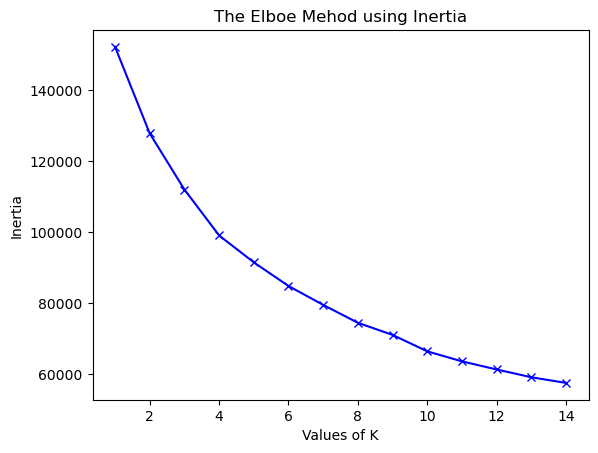

In [196]:
### finding the best value for k using the Elbow method
inertia=[]
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elboe Mehod using Inertia')
plt.show()

### We consider the value of k as 4 because there is sudden change in the graph at 4.

In [201]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans_new = pd.concat([pca_df1,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans_new

,PCA1,PCA2,Cluster
0,-1.682219,-1.076450,2
1,-1.138306,2.506481,1
2,0.969685,-0.383515,0
3,-0.873628,0.043166,2
4,-1.599431,-0.688580,2
...,...,...,...
8945,-0.359623,-2.016146,0
8946,-0.564362,-1.639125,0
8947,-0.926197,-1.810787,0
8948,-2.336547,-0.657969,2


In [158]:
kmeans_model.cluster_centers_

array([[ 1.45957775e+00,  3.84753065e-01, -2.34638427e-01,
        -1.63914013e-01, -2.53746975e-01,  1.68897201e+00,
        -5.04847568e-01, -2.12939102e-01, -4.50201244e-01,
         1.74594805e+00,  1.61714316e+00, -2.83579688e-01,
         8.38967661e-01,  6.03820830e-01,  4.90909814e-01,
        -4.06367280e-01, -9.71460234e-02],
       [-2.65551629e-01, -3.68944296e-01, -3.43190301e-01,
        -2.30500433e-01, -3.87798111e-01, -1.82691101e-01,
        -7.97822605e-01, -3.89436941e-01, -7.14245761e-01,
        -1.01500402e-01, -1.64607283e-01, -4.74987456e-01,
        -3.34417115e-01, -2.62060256e-01, -1.19249231e-01,
        -2.58865702e-01, -5.29718263e-02],
       [ 9.54484507e-01,  4.62693629e-01,  3.12584465e+00,
         2.71325131e+00,  2.40646962e+00, -1.55090594e-01,
         1.13633760e+00,  1.79865349e+00,  1.06591778e+00,
        -3.19095705e-01, -1.70458235e-01,  3.00325068e+00,
         1.42988161e+00,  1.91909626e+00,  4.77420629e-01,
         4.54702830e-01,  3.2

In [202]:
pca_df_kmeans_new['Cluster'].value_counts()

2    3977
0    3366
1    1198
3     409
Name: Cluster, dtype: int64

In [203]:
pca_df_kmeans_new['Cluster'].value_counts().sum()

8950

In [204]:
df6.shape

(8950, 17)

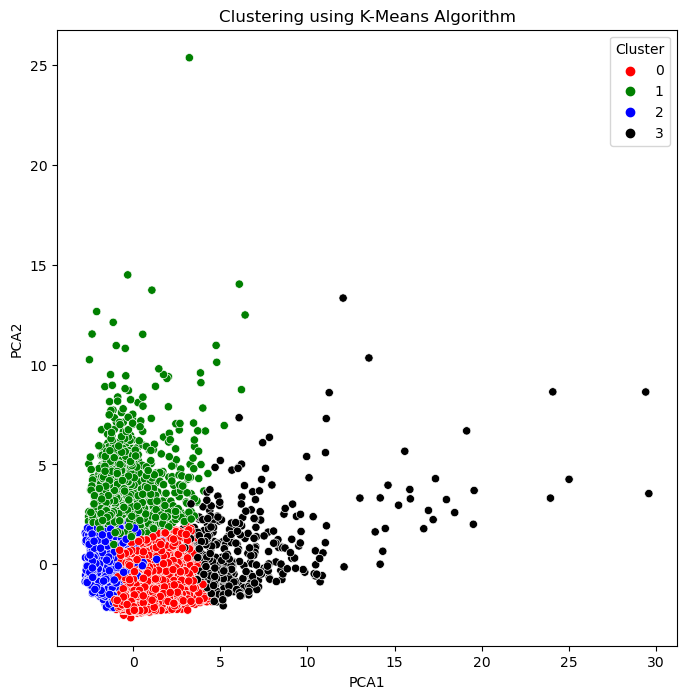

In [207]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=pca_df_kmeans_new,
                   palette=['red','green','blue','black'] )
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [208]:
#creating a target column 'Cluster'

In [209]:
cluster_df=pd.concat([df6,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [210]:
cluster_df['Cluster'].value_counts()

2    3977
0    3366
1    1198
3     409
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='count'>

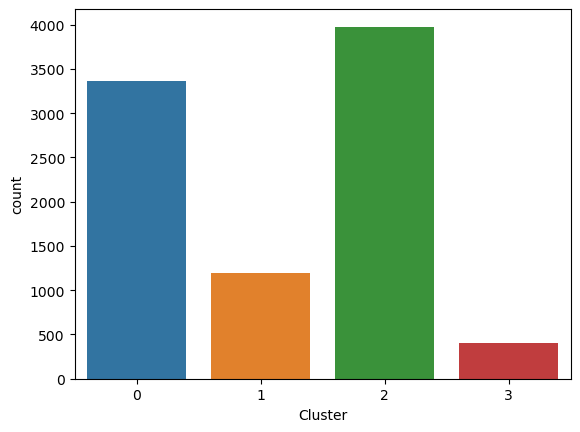

In [211]:
sns.countplot(x='Cluster',data=cluster_df)

## We can design the recommendation system using this cluster with help of domain expert.